In [1]:
%matplotlib notebook 

import cytoflow as flow

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
tube1 = flow.Tube(file='../../cytoflow/tests/data/Plate01/RFP_Well_A3.fcs',
                  conditions = {"Dox" : 10.0})

tube2 = flow.Tube(file='../../cytoflow/tests/data/Plate01/CFP_Well_A4.fcs',
                  conditions = {"Dox" : 1.0})

import_op = flow.ImportOp(conditions = {"Dox" : "log"},
                          tubes = [tube1, tube2])

ex = import_op.apply()

In [4]:
logicle = flow.LogicleTransformOp()
logicle.name = "Logicle transformation"
logicle.channels = ['V2-A', 'Y2-A', 'B1-A']
logicle.estimate(ex)
ex2 = logicle.apply(ex)

In [ ]:
h = flow.HistogramView()
h.channel = 'Y2-A'
h.huefacet = 'Dox'
r = flow.RangeSelection(view = h)
r.plot(ex2)
r.interactive = True

In [ ]:
print r.low, r.high

<IPython.core.display.Javascript object>


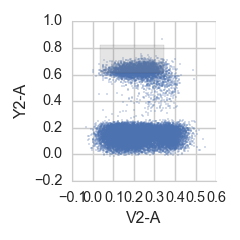

In [5]:
r2d = flow.Range2DOp(xchannel = "V2-A",
                     ychannel = "Y2-A")
r2dv = r2d.default_view()
r2dv.plot(ex2)
r2dv.interactive = True

In [6]:
print r2d.xlow, r2d.xhigh, r2d.ylow, r2d.yhigh

0.0380070311203 0.348473582767 0.611162766402 0.821777058086


In [ ]:
p = flow.PolygonOp(name = "derp",
                   xchannel = "V2-A",
                   ychannel = "Y2-A")
pv = p.default_view()
pv.interactive = True
pv.plot(ex2)

In [ ]:
print p.vertices